# # ALL THE ANSWER ARE IN THE BOTTOM OF JUPYTER
Name: JINCHENG YUAN ID:5076478446

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import statsmodels.api as sm

In [9]:
dt=pd.read_csv("data/data_banknote_authentication.txt",sep=",",header=None)

In [10]:
#*************************question b**************************
dt1=dt.values
row=dt1.shape[0]#row of dataframe
da0=dt1[1,:]
da1=dt1[1,:]#da0 is class 0,da1 is class 1,a represent array
for i in range(0,row):
    if (dt1[i,4]==0):
        da0=np.row_stack((da0,dt1[i,:]))
    elif(dt1[i,4]==1):
        da1=np.row_stack((da1,dt1[i,:]))
    else:print("end") #split data
da0 = np.delete(da0, 0, 0)  
da1 = np.delete(da1, 0, 0)  
df0 = pd.DataFrame(data=da0,index=None,columns=None)
df1 = pd.DataFrame(data=da1,index=None,columns=None)#change back to dataframe

dt.columns=['v','s','e','c','class']

In [5]:
dt1

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

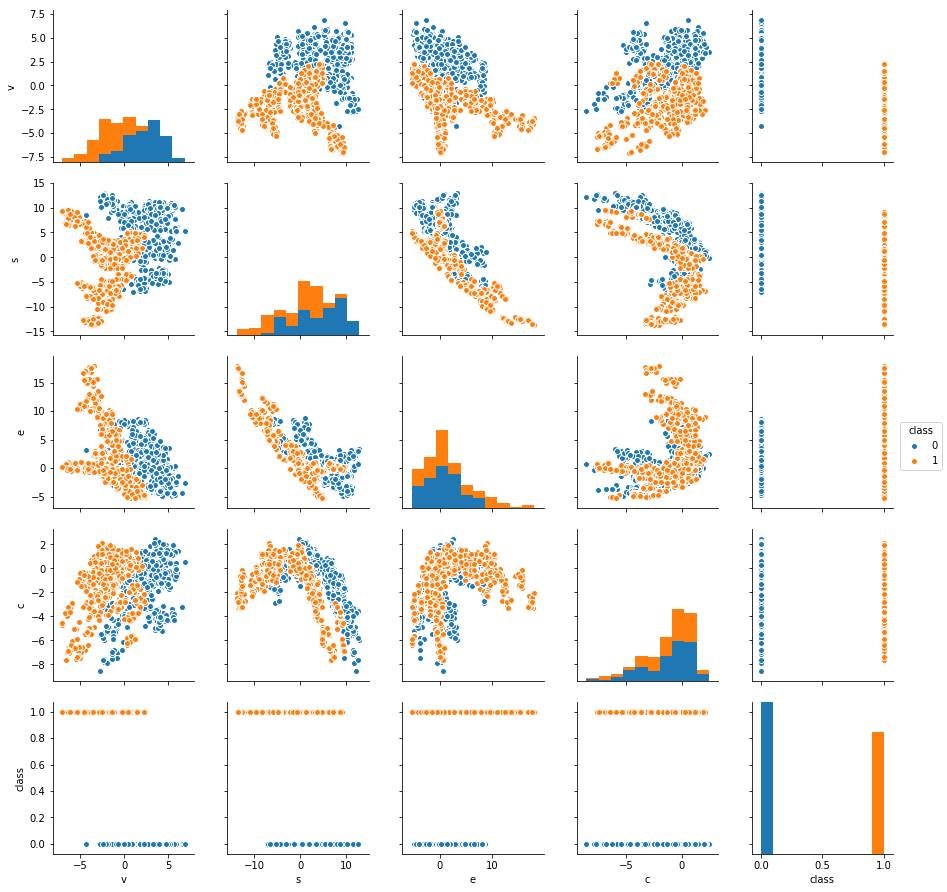

In [11]:
sns.pairplot(dt,hue="class")

C:\Users\13777\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


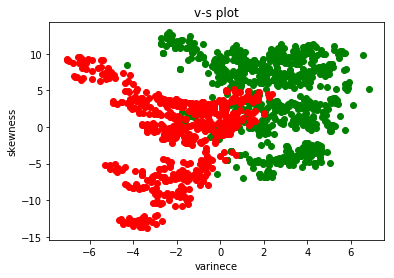

In [12]:
def plot_vs_plot():
    fig=plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(df0.iloc[:,0],df0.iloc[:,1],color='green',label='0')
    ax1.scatter(df1.iloc[:,0],df1.iloc[:,1],color='red',label='1')
    ax1 = fig.add_subplot(1,1,1)
    #varinece-skewness plot
    plt.title('v-s plot')
    plt.xlabel('varinece')
    plt.ylabel('skewness')
    plt.show()
plot_vs_plot()

In [5]:
def plot_vc_plot():
    fig=plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(df0.iloc[:,0],df0.iloc[:,2],color='green')
    ax1.scatter(df1.iloc[:,0],df1.iloc[:,2],color='red')
    #varinece-curtosis plot
    plt.title('v-c plot')
    plt.xlabel('varinece')
    plt.ylabel('curtosis')
    plt.show()

In [6]:
def plot_ve_plot():
    fig=plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(df0.iloc[:,0],df0.iloc[:,3],color='green')
    ax1.scatter(df1.iloc[:,0],df1.iloc[:,3],color='red')
    #varinece-enropy plot
    plt.title('v-e plot')
    plt.xlabel('varinece')
    plt.ylabel('enropy ')
    plt.show()

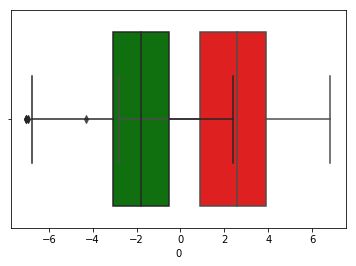

In [7]:
bx=sns.boxplot(df0.iloc[:,0],color='red') 
bx=sns.boxplot(df1.iloc[:,0],color='green') #boxplot of varience

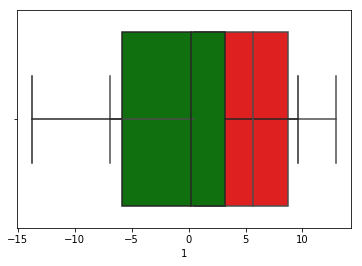

In [8]:
bx=sns.boxplot(df0.iloc[:,1],color='red') 
bx=sns.boxplot(df1.iloc[:,1],color='green')#boxplot of skewness

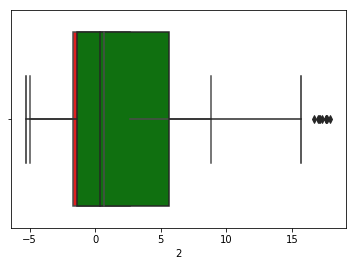

In [9]:
bx=sns.boxplot(df0.iloc[:,2],color='red') 
bx=sns.boxplot(df1.iloc[:,2],color='green')#boxplot of curtosis

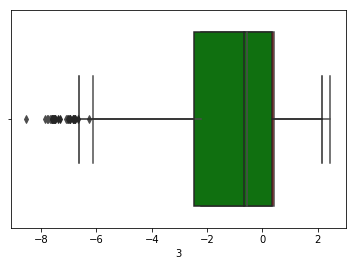

In [10]:
bx=sns.boxplot(df0.iloc[:,3],color='red') 
bx=sns.boxplot(df1.iloc[:,3],color='green')#boxplot of enropy

In [13]:
trainSet=da0[0:200]
for i in range(0,200):
    trainSet=np.row_stack((trainSet,da1[i,:]))
#set trainset

row0=da0.shape[0]
row1=da1.shape[0]#row of dataframe

#trainSet.shape

In [18]:
trainSet

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699,  0.     ],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ,  0.     ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645,  0.     ],
       ...,
       [-6.3979 ,  6.4479 ,  1.0836 , -6.6176 ,  1.     ],
       [-2.2501 ,  3.3129 , -0.88369, -2.8974 ,  1.     ],
       [-1.1859 , -1.2519 ,  2.2635 ,  0.77239,  1.     ]])

In [14]:
testSet=da0[200:row0]
for i in range(200,row1):
    testSet=np.row_stack((testSet,da1[i,:]))
    
#set testSet

testLen=testSet.shape[0]

#*************************end of question b**********************

In [15]:
#*************************question c**************************
from sklearn.neighbors import KNeighborsClassifier #package of KNN
from sklearn.neighbors import NearestNeighbors #package of KNN

In [16]:
def findNearest(k,lenB,B):# find the k nearset point of the testSet knl is the result array
    c=0   
    nearstArray=np.arange(k).reshape(1, k)
    nearstFlag=np.arange(k).reshape(1, k)
    for i in range(0,lenB):
        flag=0;
        for j in range(0,lenB):
            if B[i,j]==1:
                nearstFlag[0,flag]=j
                flag=flag+1                
        nearstArray=np.row_stack((nearstArray,nearstFlag[0,:]))
    nearstArray = np.delete(nearstArray, 0, 0)
    return nearstArray

In [17]:
def judgeCorrect(k):#calculate the correct rate
    nbrs = KNeighborsClassifier(n_neighbors=k, algorithm="auto")
    neigh = NearestNeighbors(n_neighbors=k)#set k as k
    neigh.fit(testSet)
    A=neigh.kneighbors_graph(testSet)#get the correct point of A
    B=A.toarray()#change A to array
    lenB=B.shape[0]
    knl=findNearest(k,lenB,B)
    correct=0
    error=0
    for i in range(0,lenB):       
        flag0=0
        flag1=0
        for j in range(0,k):
            f=knl[i,j]
            if testSet[f,4]==0:
                flag0=flag0+1;
            elif testSet[f,4]==1:
                flag1=flag1+1;
        if(flag0>flag1):
            result=0;
        elif(flag1>flag0):
            result=1;#majority polling if 1 is more result is 1
        if result==testSet[i,4]:
            correct=correct+1;
        else:
            error=error+1;
    return error

In [16]:
def knn_Euclidean (k):#Euclidean knn methods
    nbrs = KNeighborsClassifier(n_neighbors=k, algorithm="auto")
    testSetX=testSet[:,0:4]
    tureClassY=testSet[:,4]
    nbrs.fit(testSetX, tureClassY)
    result=nbrs.predict(testSetX)
    correct=0
    error=0
    for i in range(0,testLen):
        if result[i]==tureClassY[i]:
            correct=correct+1;
        else:
            error=error+1;#get the number of error and correct of predict
    return error

In [19]:
testSetX

NameError: name 'testSetX' is not defined

In [17]:
def findLowestErrorK():#find lowest error of k and plot the errorRate with the relationship of 1/k   
    low=1000;flag=0
    k_inverse=np.array([1])
    error_rate=np.array([0])
    for k in range(1,902,3):#k for (1,4,..901)
        errorL=np.array([knn_Euclidean(k)/testLen])
        kIn=np.array([1/k])
        k_inverse=np.column_stack((k_inverse,kIn))
        error_rate=np.column_stack((error_rate,errorL))
        if(low>errorL):
            low=errorL
            flag=k
    print("k* is")
    print(flag)#lowest index
    print("lowest error is")
    print(low)#lowest error
    k_inverse_df = pd.DataFrame(data=k_inverse,index=None,columns=None)
    error_rate_df = pd.DataFrame(data=error_rate,index=None,columns=None)#change back to dataframe
    fig=plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(k_inverse_df,error_rate_df,color='red')
    #varinece-curtosis plot
    plt.title('1/k-error rate plot')
    plt.xlabel('1/k')
    plt.ylabel('error rate')
    plt.show()
#findLowestErrorK()
 #we can see k=1 is the perfect value with 100% accurency
 #so k* is 1

In [18]:
def learningCurve():#Learning Curve and Best error rate
    N_plot=np.array([50])
    N_leastError=np.array([0])
    for N in range(50,801,50):#for N in (50,100,...800)
        num=int(N/2);
        da0N=da0[1,:]
        da1N=da1[1,:]#da0 is class 0,da1 is class 1,a represent array
        for i in range(0,num):
            testSetl=np.row_stack((testSet,da0[i,:]))
        for i in range(0,num):
            testSetl=np.row_stack((testSet,da1[i,:]))
        testSetXl=testSetl[:,0:4]
        tureClassYl=testSetl[:,4]
        Len=testSetl.shape[0]
        leastError=1000;
        for k in range(1,242,40):#starting form 1, k increasing by 40
            nbrs = KNeighborsClassifier(n_neighbors=k, algorithm="auto")
            nbrs.fit(testSetXl, tureClassYl)
            result=nbrs.predict(testSetXl)
            corrects=0
            errors=0            
            for i in range(0,Len):
                if result[i]==tureClassYl[i]:
                    corrects=corrects+1;
                else:
                    errors=errors+1;#get the number of error and correct of predict
            if (errors<leastError):
                leastError=errors#get the leastError
        N_plot=np.column_stack((N_plot,N))
        N_leastError=np.column_stack((N_leastError,leastError))
    N_plot_df = pd.DataFrame(data=N_plot,index=None,columns=None)
    N_leastError_df = pd.DataFrame(data=N_leastError,index=None,columns=None)#change back to dataframe
    fig=plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(N_plot_df,N_leastError_df)
    #varinece-curtosis plot
    plt.title('learing curve')
    plt.xlabel('N')
    plt.ylabel('best error rate')
    plt.show()
#learningCurve()
#*************************end of question c**********************      

In [20]:
#*************************question d**************************
trainSetX=trainSet[:,0:4]
trainClassY=trainSet[:,4]
trainLen=trainSet.shape[0]
def knn_Manhattan(k):
    nbrs = KNeighborsClassifier(n_neighbors=k, algorithm="auto",p=1)#set p=1 as Manhattan
    nbrs.fit(trainSetX, trainClassY)
    result=nbrs.predict(trainSetX)
    tcorrect=0
    terror=0
    for i in range(0,trainLen):
        if result[i]==trainClassY[i]:
            tcorrect=tcorrect+1;
        else:
            terror=terror+1;#get the number of error and correct of predict
    return terror
#knn_Manhattan(30)

In [23]:
trainClassY

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [20]:
import math#import math for calculate pow
def knn_Log(k,p):#calculate the log10(0.1,0.2...1) with k* in Manhattan
    nbrs = KNeighborsClassifier(n_neighbors=k,p=p)
    nbrs.fit(trainSetX, trainClassY)
    result=nbrs.predict(trainSetX)
    tcorrect=0
    terror=0
    for i in range(0,trainLen):
        if result[i]==trainClassY[i]:
            tcorrect=tcorrect+1;
        else:
            terror=terror+1;#get the number of error and correct of predict
    return terror

In [21]:
def knn_Chebyshev(k):
    nbrs = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    nbrs.fit(trainSetX, trainClassY)
    result=nbrs.predict(trainSetX)
    tcorrect=0
    terror=0
    for i in range(0,trainLen):
        if result[i]==trainClassY[i]:
            tcorrect=tcorrect+1;
        else:
            terror=terror+1;#get the number of error and correct of predict
    return terror
#knn_Chebyshev(100)

In [22]:
def knn_Mahalanobis(k):#unfinished
    nbrs = KNeighborsClassifier(n_neighbors=k, algorithm="brute",metric="mahalanobis")
    nbrs.fit(trainSetX, trainClassY)
    result=nbrs.predict(trainSetX)
    correct=0
    error=0
    for i in range(0,trainLen):
        if result[i]==trainClassY[i]:
            correct=correct+1;
        else:
            error=error+1;#get the number of error and correct of predict
    return error
#knn_Mahalanobis(1)

In [23]:
def sumerizeQusetiond():
    #find the lowest_Manhattan error and the k
    lowest_Manhattan=1000
    k_flag_Manhattan=0
    for k in range(1,400,10):
        low_Flag=knn_Manhattan(k)
        if low_Flag<lowest_Manhattan:
            lowest_Manhattan=low_Flag
            k_flag_Manhattan=k
    #print(lowest_Manhattan,k_flag_Manhattan)
    #find the lowest_Chebyshev error and the k
    lowest_Chebyshev=1000
    k_flag_Chebyshev=0
    for k in range(1,400,10):
        low_Flag=knn_Chebyshev(k)
        if low_Flag<lowest_Chebyshev:
            lowest_Chebyshev=low_Flag
            k_flag_Chebyshev=k
    #print(lowest_Chebyshev,k_flag_Chebyshev)
    lowest_Mahalanobis=1000
    k_flag_Mahalanobis=0
    for k in range(1,400,10):
        low_Flag=knn_Mahalanobis(k)
        if low_Flag<lowest_Mahalanobis:
            lowest_Mahalanobis=low_Flag
            k_flag_Mahalanobis=k
    #print(lowest_Mahalanobis,k_flag_Mahalanobis)   
    for i in range(1,11):
        p=math.pow(10,1/i)
        #print(knn_Log(k_flag_Manhattan,p))
    error_k_table ={"Manhattan":(lowest_Manhattan,k_flag_Manhattan),"Chebyshev":(lowest_Chebyshev,k_flag_Chebyshev),"Mahalanobis":(lowest_Mahalanobis,k_flag_Mahalanobis)}
    print(error_k_table)   
sumerizeQusetiond()
#*************************end of question d**********************

{'Manhattan': (0, 1), 'Chebyshev': (0, 1), 'Mahalanobis': (0, 1)}


In [24]:
#*************************question e***************************
def knn_weightedEuclidean (k):#weightedEuclidean knn methods
    nbrs = KNeighborsClassifier(n_neighbors=k, algorithm="auto",weights="distance")#set weights as distance
    testSetX=testSet[:,0:4]
    tureClassY=testSet[:,4]
    nbrs.fit(testSetX, tureClassY)
    result=nbrs.predict(testSetX)
    correct=0
    error=0
    for i in range(0,testLen):
        if result[i]==tureClassY[i]:
            correct=correct+1;
        else:
            error=error+1;#get the number of error and correct of predict
    return error
#knn_weightedEuclidean(700)

In [25]:
def knn_weightedManhattan(k):#weightedManhattan knn methods
    nbrs = KNeighborsClassifier(n_neighbors=k, algorithm="auto",p=1,weights="distance")#set p=1 as Manhattan,weights as disatance
    nbrs.fit(trainSetX, trainClassY)
    result=nbrs.predict(trainSetX)
    tcorrect=0
    terror=0
    for i in range(0,trainLen):
        if result[i]==trainClassY[i]:
            tcorrect=tcorrect+1;
        else:
            terror=terror+1;#get the number of error and correct of predict
    return terror
#knn_weightedManhattan(30)

In [26]:
def knn_weightedChebyshev(k):#weightedChebyshev knn methods
    nbrs = KNeighborsClassifier(n_neighbors=k, metric='chebyshev',weights="distance")#set weights as distance
    nbrs.fit(trainSetX, trainClassY)
    result=nbrs.predict(trainSetX)
    tcorrect=0
    terror=0
    for i in range(0,trainLen):
        if result[i]==trainClassY[i]:
            tcorrect=tcorrect+1;
        else:
            terror=terror+1;#get the number of error and correct of predict
    return terror
#knn_weightedChebyshev(100)

In [27]:
def sumerizeQusetione():
    #find the lowest_Manhattan error and the k
    lowest_Manhattan=1000
    k_flag_Manhattan=0
    for k in range(1,400,10):#train set cannot upper than 400, for it only have 400 data
        low_Flag=knn_weightedManhattan(k)
        if low_Flag<lowest_Manhattan:
            lowest_Manhattan=low_Flag
            k_flag_Manhattan=k
    #print(lowest_Manhattan,k_flag_Manhattan)
    #find the lowest_Chebyshev error and the k
    lowest_Chebyshev=1000
    k_flag_Chebyshev=0
    for k in range(1,400,10):
        low_Flag=knn_weightedChebyshev(k)
        if low_Flag<lowest_Chebyshev:
            lowest_Chebyshev=low_Flag
            k_flag_Chebyshev=k
    #print(lowest_Chebyshev,k_flag_Chebyshev)   
    lowest_Euclidean=1000
    k_flag_Euclidean=0    
    for k in range(1,400,10):
        low_Flag=knn_weightedEuclidean(k)
        if low_Flag<lowest_Euclidean:
            lowest_Euclidean=low_Flag
            k_flag_Euclidean=k
    #print(lowest_Euclidean,k_flag_Euclidean)
    error_k_table ={"weightManhattan":(lowest_Manhattan,k_flag_Manhattan),"weightChebyshev":(lowest_Chebyshev,k_flag_Chebyshev),"weightMahalanobis":(lowest_Mahalanobis,k_flag_Mahalanobis)}
    print(error_k_table)  
#sumerizeQusetione()
#*************************end of question e**********************
#all the question and answer are below

# *********question and answer*********

# (b) Pre-Processing and Exploratory data analysis: 

i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1. 

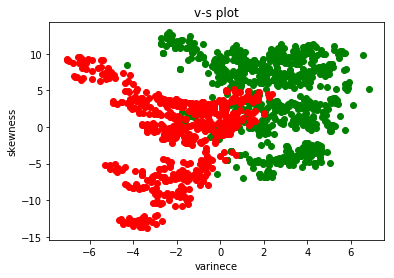

In [28]:
plot_vs_plot()#plot of varinece and skewness

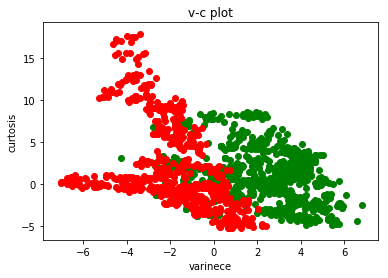

In [29]:
plot_vc_plot()#plot of varinece and curtosis

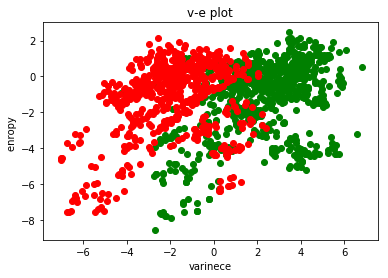

In [30]:
plot_ve_plot()#plot of varinece and enropy

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

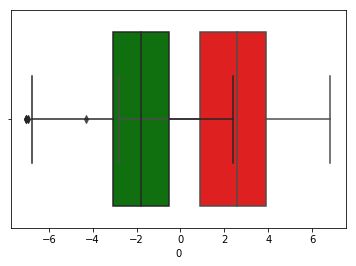

In [31]:
bx=sns.boxplot(df0.iloc[:,0],color='red') 
bx=sns.boxplot(df1.iloc[:,0],color='green') #boxplot of varience

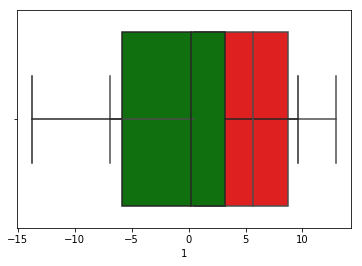

In [32]:
bx=sns.boxplot(df0.iloc[:,1],color='red') 
bx=sns.boxplot(df1.iloc[:,1],color='green')#boxplot of skewness

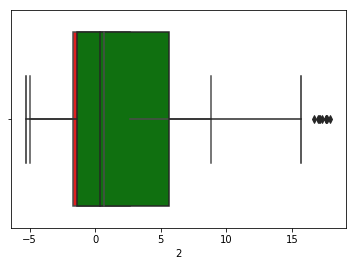

In [33]:
bx=sns.boxplot(df0.iloc[:,2],color='red') 
bx=sns.boxplot(df1.iloc[:,2],color='green')#boxplot of curtosis

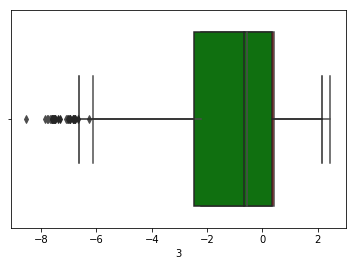

In [34]:
bx=sns.boxplot(df0.iloc[:,3],color='red') 
bx=sns.boxplot(df1.iloc[:,3],color='green')#boxplot of enropy

iii. Select the ﬁrst 200 rows of Class 0 and the ﬁrst 200 rows of Class 1 as the test set and the rest of the data as the training set.

In [35]:
#trainSet=da0[0:200]
#for i in range(0,200):
    #trainSet=np.row_stack((trainSet,da1[i,:]))
#set trainset
#row0=da0.shape[0]
#row1=da1.shape[0]#row of dataframe
#trainSet.shape
#testSet=da0[200:row0]
#for i in range(200,row1):
    #testSet=np.row_stack((testSet,da1[i,:]))
#set testSet
#testLen=testSet.shape[0]
#******code run in the front part******

# (c) Classiﬁcation using KNN on Banknote authentication Dataset

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

code are in the above

ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of 1/k for k ∈{1,4,7,...,901}. You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-score when k = k∗.

k* is
1
lowest error is
[0.]


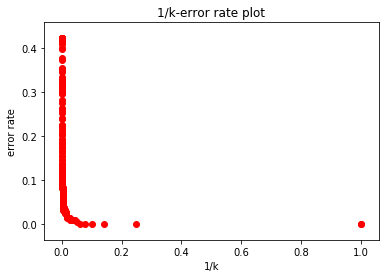

{'TP': 200, 'FP': 0, 'FN': 0, 'TN': 200}


In [36]:
findLowestErrorK()
#we can know error rate is 0%,with 200 class 1 and 200 class 2. 
#so ture positive rate is 100% ture negative rate is 100% precision is 1， F-score =1
confusion_matrix ={"TP":200,"FP":0,"FN":0,"TN":200}
print(confusion_matrix)#PRINT the confusion matrix

iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈{50,100,150,...,900}.1 Note: for each N, select your training set by choosing the ﬁrst N/2 rows of Class 0 and the ﬁrst N/2 rows of Class 1 in the training set you creatd in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 40. For example, if N = 250, the optimal k is selected from {1,41,81,...,241}. This plot is called a Learning Curve.

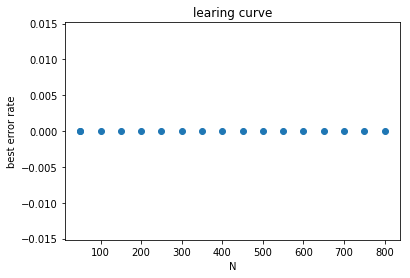

In [38]:
learningCurve()

# (d) Replace the Euclidean metric with the following metrics2 and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when k ∈{1,11,21,...,901}.

i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1.

In [39]:
lowest_Manhattan=1000
k_flag_Manhattan=0
for k in range(1,400,10):
    low_Flag=knn_Manhattan(k)
    if low_Flag<lowest_Manhattan:
        lowest_Manhattan=low_Flag
        k_flag_Manhattan=k

print(lowest_Manhattan,k_flag_Manhattan)

0 1


B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [40]:
for i in range(1,11):
    p=math.pow(10,1/i)
    print(knn_Log(k_flag_Manhattan,p))

0
0
0
0
0
0
0
0
0
0


We can see all the lowest error is zero, so any p in log10(p) p for(0.1 0.2....1) has the best accrucy of 100%

C. which becomes Chebyshev Distance with p →∞

In [41]:
#find the lowest_Chebyshev error and the k
lowest_Chebyshev=1000
k_flag_Chebyshev=0
for k in range(1,400,10):
    low_Flag=knn_weightedChebyshev(k)
    if low_Flag<lowest_Chebyshev:
        lowest_Chebyshev=low_Flag
        k_flag_Chebyshev=k
print(lowest_Chebyshev,k_flag_Chebyshev)   

0 1


ii. Mahalanobis Distance. 

In [42]:
lowest_Mahalanobis=1000
k_flag_Mahalanobis=0
for k in range(1,400,10):
    low_Flag=knn_Mahalanobis(k)
    if low_Flag<lowest_Mahalanobis:
        lowest_Mahalanobis=low_Flag
        k_flag_Mahalanobis=k
print(lowest_Mahalanobis,k_flag_Mahalanobis)   

0 1


summerize it in a table

In [43]:
sumerizeQusetiond()

{'Manhattan': (0, 1), 'Chebyshev': (0, 1), 'Mahalanobis': (0, 1)}


# (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater inﬂuence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈{1,11,21,...,901}.

In [44]:
sumerizeQusetione()

{'weightManhattan': (0, 1), 'weightChebyshev': (0, 1), 'weightMahalanobis': (0, 1)}


although it looks like have same result(because both of weighted and uniform can reach the accrucy of 100%), after weighted, it will have better performance in predict. No matter what k you choose, it can have 0% error rate

In [45]:
knn_weightedChebyshev(300)

0

In [46]:
knn_Chebyshev(300)

132

for example while k=300, weighted Chebyshev has 0 error and uniform Chebyshev has 132 error

# (f) What is the lowest training error rate you achieved in this exercise?

In many question we reach the training error rate of 0